**Dataset_01 Task 1**

---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd ./drive/MyDrive/AI_Final_Project

/content/drive/.shortcut-targets-by-id/1i_yF73pfXXJHdstf8vFRkNXogN3Jh_oL/AI_Final_Project


In [ ]:
ls CECS551_dataset_01/

catboost_info/  store_features/  stores.csv  test.csv  train.csv


In [ ]:
ls CECS551_dataset_01/store_features/

store_01.csv   store_04.xlsx  store_07.xlsx  store_10.xlsx
store_02.csv   store_05.xlsx  store_08.xlsx  store_11_35.xlsx
store_03.xlsx  store_06.xlsx  store_09.xlsx


In [ ]:
df_train = pd.read_csv("./CECS551_dataset_01/train.csv")
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
df_11_35 = pd.read_excel("./CECS551_dataset_01/store_features/store_11_35.xlsx")
df_11_35

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,11.0,2010-02-05,False,46.04,2.572,NaN,NaN,NaN,NaN,214.424881,7.368
1,11.0,2010-02-12,True,48.01,2.548,NaN,NaN,NaN,NaN,214.574792,7.368
2,11.0,2010-02-19,False,48.30,2.514,NaN,NaN,NaN,NaN,214.619887,7.368
3,11.0,2010-02-26,False,52.79,2.561,NaN,NaN,NaN,NaN,214.647513,7.368
4,11.0,2010-03-05,False,53.96,2.625,NaN,NaN,NaN,NaN,214.675139,7.368
...,...,...,...,...,...,...,...,...,...,...,...
4545,35.0,2013-06-28,False,77.34,3.639,4764.55,85.65,NaN,4660.01,NaN,NaN
4546,35.0,2013-07-05,False,77.41,3.614,6333.87,138.09,610.35,7224.45,NaN,NaN
4547,35.0,2013-07-12,False,80.74,3.614,4798.18,130.88,22.05,2351.60,NaN,NaN
4548,35.0,2013-07-19,False,83.36,3.737,2318.53,122.30,23.45,771.35,NaN,NaN


In [ ]:
df_1_10 = pd.read_csv("./CECS551_dataset_01/store_features/store_01.csv")
for i in range(3,10):
  df_1_10 = pd.concat([df_1_10,pd.read_excel("./CECS551_dataset_01/store_features/store_0"+str(i)+".xlsx")],axis=0)
df_1_10 = pd.concat([df_1_10,pd.read_excel("./CECS551_dataset_01/store_features/store_10.xlsx")],axis=0)
df_1_10 = df_1_10.reset_index()
df_1_10.tail()

,index,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
1633,177,10.0,2013-06-28 00:00:00,False,90.28,3.781,5894.36,102.74,10.50,5852.61,NaN,NaN
1634,178,10.0,2013-07-05 00:00:00,False,93.54,3.753,14076.31,1533.74,523.78,7971.03,NaN,NaN
1635,179,10.0,2013-07-12 00:00:00,False,87.18,3.737,5894.71,393.58,38.54,4523.58,NaN,NaN
1636,180,10.0,2013-07-19 00:00:00,False,87.09,3.823,7816.71,791.21,165.00,8330.84,NaN,NaN
1637,181,10.0,2013-07-26 00:00:00,False,83.32,3.865,1221.15,936.36,165.50,198.93,NaN,NaN


In [ ]:
df_1_10 =df_1_10.drop("index",axis=1)

In [ ]:
df_1_10["Date"] = pd.to_datetime(df_1_10["Date"])
df_1_10

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1.0,2010-02-05,False,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1.0,2010-02-12,True,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1.0,2010-02-19,False,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
3,1.0,2010-02-26,False,60.12,3.555,6129.28,1802.84,NaN,301.48,224.132020,6.833
4,1.0,2010-03-05,False,61.65,3.630,3552.58,601.32,NaN,2666.22,224.347025,6.833
...,...,...,...,...,...,...,...,...,...,...,...
1633,10.0,2013-06-28,False,90.28,3.781,5894.36,102.74,10.50,5852.61,NaN,NaN
1634,10.0,2013-07-05,False,93.54,3.753,14076.31,1533.74,523.78,7971.03,NaN,NaN
1635,10.0,2013-07-12,False,87.18,3.737,5894.71,393.58,38.54,4523.58,NaN,NaN
1636,10.0,2013-07-19,False,87.09,3.823,7816.71,791.21,165.00,8330.84,NaN,NaN


In [ ]:
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
df_fin = pd.merge(df_1_10, df_train,"left",["Store","Date","IsHoliday"])
df_fin = df_fin.dropna()
df_fin

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Dept,Weekly_Sales
0,1.0,2010-02-05,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,1.0,24924.50
1,1.0,2010-02-05,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,2.0,50605.27
2,1.0,2010-02-05,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,3.0,13740.12
3,1.0,2010-02-05,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,4.0,39954.04
4,1.0,2010-02-05,False,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,5.0,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87908,10.0,2012-10-26,False,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,94.0,795.76
87909,10.0,2012-10-26,False,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,95.0,64643.03
87910,10.0,2012-10-26,False,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,96.0,13966.23
87911,10.0,2012-10-26,False,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,97.0,4785.28


In [ ]:
df_fin['Date']=pd.to_datetime(df_fin['Date']).apply(pd.Timestamp.timestamp)
df_fin = pd.get_dummies(df_fin, columns=['IsHoliday'], drop_first=True)
df_fin = df_fin.rename({"IsHoliday_True":"IsHoliday"},axis=1)
df_fin["IsHoliday"] = df_fin["IsHoliday"].astype("float64")
df_fin

,Store,Date,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
0,1.0,1.265328e+09,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,1.0,24924.50,0.0
1,1.0,1.265328e+09,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,2.0,50605.27,0.0
2,1.0,1.265328e+09,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,3.0,13740.12,0.0
3,1.0,1.265328e+09,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,4.0,39954.04,0.0
4,1.0,1.265328e+09,59.33,3.360,9667.50,268.29,0.6,8368.15,223.659114,6.833,5.0,32229.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87908,10.0,1.351210e+09,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,94.0,795.76,0.0
87909,10.0,1.351210e+09,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,95.0,64643.03,0.0
87910,10.0,1.351210e+09,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,96.0,13966.23,0.0
87911,10.0,1.351210e+09,70.50,4.301,9657.93,63.30,100.0,1925.87,131.193097,6.943,97.0,4785.28,0.0


In [ ]:
df_fin = df_fin.reset_index()

In [ ]:
df_fin.describe()


,index,Store,Date,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
count,24094.000000,24094.000000,2.409400e+04,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000,24094.000000
mean,40511.685191,5.170250,1.328889e+09,63.072703,3.496201,6952.225863,3001.637607,1589.891935,2903.389138,200.873910,6.464924,43.695650,18117.859917,0.107164
std,27024.931785,2.999755,1.836013e+07,17.615083,0.258274,7495.569352,9942.247500,11174.560028,5169.342601,37.641651,1.184183,29.813977,26076.620144,0.309328
min,0.000000,1.000000,1.265328e+09,7.460000,3.031000,35.940000,-10.980000,0.010000,5.940000,129.816710,4.077000,1.000000,-863.000000,0.000000
25%,16761.250000,3.000000,1.324598e+09,50.530000,3.290000,2592.370000,24.030000,3.000000,425.290000,196.943271,5.668000,19.000000,2487.715000,0.000000
50%,38176.500000,5.000000,1.331251e+09,63.590000,3.486000,4971.010000,123.320000,15.180000,1129.200000,221.932727,6.132000,36.000000,8235.420000,0.000000
75%,65537.750000,8.000000,1.342138e+09,79.940000,3.677000,8687.470000,1540.990000,72.930000,3197.560000,224.562029,7.545000,71.000000,22593.590000,0.000000
max,87912.000000,10.000000,1.351210e+09,90.230000,4.301000,56917.700000,104519.540000,141630.610000,48086.640000,228.729864,8.513000,99.000000,630999.190000,1.000000


In [ ]:
df_fin.isnull( ).sum( )

index                    0
Store                    0
Date                     0
Temperature              0
gas_price                0
discount_promotional     0
discount_clearance       0
discount_damaged_good    0
discount_competitive     0
CPI                      0
Unemployment             0
Dept                     0
Weekly_Sales             0
IsHoliday                0
dtype: int64

In [ ]:
df_fin.dtypes 

index                      int64
Store                    float64
Date                     float64
Temperature              float64
gas_price                float64
discount_promotional     float64
discount_clearance       float64
discount_damaged_good    float64
discount_competitive     float64
CPI                      float64
Unemployment             float64
Dept                     float64
Weekly_Sales             float64
IsHoliday                float64
dtype: object

In [ ]:
df_fin = df_fin.drop(["index"],axis=1)

In [ ]:
df_fin.columns

Index(['Store', 'Date', 'Temperature', 'gas_price', 'discount_promotional',
       'discount_clearance', 'discount_damaged_good', 'discount_competitive',
       'CPI', 'Unemployment', 'Dept', 'Weekly_Sales', 'IsHoliday'],
      dtype='object')

In [ ]:
df_finY=df_fin['Weekly_Sales']
df_finX=df_fin.drop(["Weekly_Sales"], axis=1)
print(df_finY.shape,df_finX.shape)


(24094,) (24094, 12)


In [ ]:
df_test = pd.merge(df_11_35, df_train,"left",["Store","Date","IsHoliday"])
df_test = df_test.dropna()
df_test

,Store,Date,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Dept,Weekly_Sales
6438,11.0,2011-11-11,False,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,1.0,16095.39
6439,11.0,2011-11-11,False,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,2.0,54084.66
6440,11.0,2011-11-11,False,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,3.0,11508.90
6441,11.0,2011-11-11,False,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,4.0,29087.87
6442,11.0,2011-11-11,False,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,5.0,45662.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243379,35.0,2012-10-26,False,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,93.0,1045.94
243380,35.0,2012-10-26,False,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,94.0,11.64
243381,35.0,2012-10-26,False,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,95.0,41216.59
243382,35.0,2012-10-26,False,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,97.0,3620.74


In [ ]:
df_test = df_test.reset_index()
df_test = df_test.drop(["index"],axis=1)
df_test['Date']=pd.to_datetime(df_test['Date']).apply(pd.Timestamp.timestamp)
df_test = pd.get_dummies(df_test, columns=['IsHoliday'], drop_first=True)
df_test = df_test.rename({"IsHoliday_True":"IsHoliday"},axis=1)
df_test["IsHoliday"] = df_test["IsHoliday"].astype("float64")
df_test

,Store,Date,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
0,11.0,1.320970e+09,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,1.0,16095.39,0.0
1,11.0,1.320970e+09,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,2.0,54084.66,0.0
2,11.0,1.320970e+09,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,3.0,11508.90,0.0
3,11.0,1.320970e+09,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,4.0,29087.87,0.0
4,11.0,1.320970e+09,64.20,3.297,9134.39,10126.19,473.38,2206.22,221.411752,7.197,5.0,45662.48,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61016,35.0,1.351210e+09,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,93.0,1045.94,0.0
61017,35.0,1.351210e+09,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,94.0,11.64,0.0
61018,35.0,1.351210e+09,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,95.0,41216.59,0.0
61019,35.0,1.351210e+09,58.99,3.882,6221.06,42.48,103.00,273.90,142.762411,8.665,97.0,3620.74,0.0


In [ ]:
df_testY=df_test['Weekly_Sales']
df_testX=df_test.drop(["Weekly_Sales"], axis=1)
print(df_testY.shape,df_testX.shape)

(61021,) (61021, 12)


In [ ]:
X_train,X_test, y_train, y_test = df_finX, df_testX, df_finY, df_testY

### Linear Regression Model

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
X,X_test, y, y_test = df_finX, df_testX, df_finY, df_testY
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
predictions =clf.predict(X)
mse_linear_train = mean_squared_error(y,predictions)
print(mse_linear_train)
predictions =clf.predict(X_test)
mse_linear_test = mean_squared_error(y_test,predictions)
print(mse_linear_test)

624527208.02443
659821707.4240711


In [ ]:
feature_scores = pd.Series(clf.coef_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

Dept                      111.970131
Temperature                76.227654
discount_damaged_good       0.136422
discount_promotional        0.113851
discount_competitive        0.057136
discount_clearance          0.047840
Date                       -0.000097
Unemployment             -148.588929
CPI                      -163.441624
Store                    -725.599212
IsHoliday                -915.150497
gas_price               -1159.189804
dtype: float64


In [ ]:
import pandas as pd , numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
diabetes_df = datasets.load_diabetes()
X = diabetes_df.data
y = diabetes_df.target
X2  = sma.add_constant(X)

In [ ]:
X = X_train
y = y_train
from scipy import stats
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
new_X = np.append(np.ones((len(X),1)), X, axis=1)
M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.   , 0.   , 0.   , 0.   , 0.134, 0.002, 0.01 , 0.   , 0.282,
       0.   , 0.327, 0.   , 0.133])

In [ ]:
X_train.columns

Index(['Store', 'Date', 'Temperature', 'gas_price', 'discount_promotional',
       'discount_clearance', 'discount_damaged_good', 'discount_competitive',
       'CPI', 'Unemployment', 'Dept', 'IsHoliday'],
      dtype='object')

In [ ]:
X_train,X_test, y_train, y_test = X_train.drop(["discount_promotional","discount_competitive","Unemployment","IsHoliday"],axis=1),X_test.drop(["discount_promotional","discount_competitive","Unemployment","IsHoliday"],axis=1), y_train, y_test

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
predictions =LinearReg.predict(X_test)
mse = mean_squared_error(y_test,predictions)
print(mse)

665243676.784072


In [ ]:
feature_scores = pd.Series(LinearReg.coef_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

Dept                      112.324258
Temperature                78.635925
discount_damaged_good       0.112393
discount_clearance          0.030559
Date                       -0.000090
CPI                      -171.487119
Store                    -734.020696
gas_price               -1712.507021
dtype: float64


In [ ]:
X = X_train
y = y_train
from scipy import stats
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
new_X = np.append(np.ones((len(X),1)), X, axis=1)
M_S_E = (sum((y-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

array([0.   , 0.   , 0.   , 0.   , 0.02 , 0.078, 0.   , 0.   , 0.   ])

### Boosting Method

In [ ]:
X,X_test, y, y_test = df_finX, df_testX, df_finY, df_testY
import xgboost as xgb
from sklearn import metrics
clf = xgb.XGBRegressor(n_estimators=10, max_depth=30, eta=0.2, subsample=0.8, colsample_bytree=0.8)
clf.fit(X, y)
predictions =clf.predict(X)
mse_xgb_train = mean_squared_error(y,predictions)
print(mse_xgb_train)
predictions =clf.predict(X_test)
mse_xgb_test = mean_squared_error(y_test,predictions)
print(mse_xgb_test)

[06:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
179538500.1679972
368240644.7715565


In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_scores)

Dept                     0.475596
CPI                      0.143312
Store                    0.139136
Unemployment             0.129131
discount_damaged_good    0.043727
discount_competitive     0.021076
discount_promotional     0.019886
Date                     0.010362
gas_price                0.006649
discount_clearance       0.005517
Temperature              0.005103
IsHoliday                0.000506
dtype: float32


In [ ]:
clf.feature_importances_

array([0.13913621, 0.01036216, 0.0051027 , 0.00664942, 0.01988607,
       0.00551686, 0.04372655, 0.02107589, 0.14331193, 0.12913078,
       0.47559556, 0.00050589], dtype=float32)

### ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
# adf_test(df['AvgTemp'])

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df= df_fin["Weekly_Sales"].transpose()
ad_test(df)

1. ADF :  -18.502493593096098
2. P-Value :  2.1196712094105405e-30
3. Num Of Lags :  46
4. Num Of Observations Used For ADF Regression: 24047
5. Critical Values :
	 1% :  -3.430621967321787
	 5% :  -2.861660201112035
	 10% :  -2.566833979573872


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=552587.945, Time=8.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=561638.511, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=557067.152, Time=1.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=553502.591, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=561636.511, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=552821.342, Time=6.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=36.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=552906.757, Time=4.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=552670.844, Time=7.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=19.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=39.63 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=552585.945, Time=7.71 sec
 ARIMA(1,1,2)(0,0,0)[0]            

In [ ]:
idx= np.linspace(0,364,365).astype('int32')

In [ ]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[-10:]
print(train.shape,test.shape)
df

(24094,)
(24084,) (10,)


0        24924.50
1        50605.27
2        13740.12
3        39954.04
4        32229.38
           ...   
24089      795.76
24090    64643.03
24091    13966.23
24092     4785.28
24093      560.02
Name: Weekly_Sales, Length: 24094, dtype: float64

In [ ]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train,order=(2,1,2))

In [ ]:
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                24084
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -276172.727
Date:                Sat, 19 Nov 2022   AIC                         552355.453
Time:                        05:55:42   BIC                         552395.899
Sample:                             0   HQIC                        552368.568
                              - 24084                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6695      0.009    -78.064      0.000      -0.686      -0.653
ar.L2          0.1634      0.006     28.203      0.000       0.152       0.175
ma.L1          0.0415      0.008      5.521      0.000       0.027       0.056
ma.L2         -0.8024      0.007   -121.879      0.000      -0.815      -0.789
sigma2      5.638e+08   3.74e-11   1.51e+19      0.000    5.64e+08    5.64e+08
===================================================================================
Ljung-Box (L1) (Q):                   8.35   Jarque-Bera (JB):           1264650.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             3.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+33. Standard errors may be unstable.
"""

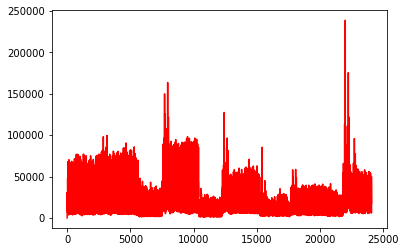

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.fittedvalues, color='red')

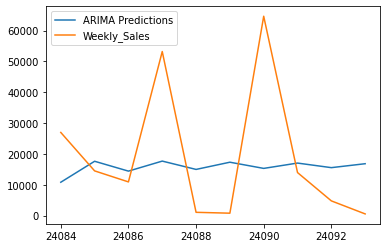

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
mse_arima_train=mean_squared_error(pred,test)
print(mse_arima_train)

483377075.9125043


In [ ]:
df_t= df_test["Weekly_Sales"].transpose()
ad_test(df_t)

1. ADF :  -21.018680411060426
2. P-Value :  0.0
3. Num Of Lags :  60
4. Num Of Observations Used For ADF Regression: 60960
5. Critical Values :
	 1% :  -3.4304572764990526
	 5% :  -2.8615874141972797
	 10% :  -2.5667952369763682


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_t, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1394015.935, Time=21.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1418972.800, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1407043.728, Time=2.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1396564.570, Time=5.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1418970.800, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1394522.909, Time=11.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=30.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=30.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=74.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1395098.128, Time=11.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1394130.188, Time=17.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=35.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=86.27 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1394013.933, Time=19.04 sec
 ARIMA(1,1,2)(0,0,0)[

In [ ]:
idx= np.linspace(0,364,365).astype('int32')

In [ ]:
print(df_t.shape)
train=df_t.iloc[:-10]
test=df_t.iloc[-10:]
print(train.shape,test.shape)
df

(61021,)
(61011,) (10,)


0        24924.50
1        50605.27
2        13740.12
3        39954.04
4        32229.38
           ...   
24089      795.76
24090    64643.03
24091    13966.23
24092     4785.28
24093      560.02
Name: Weekly_Sales, Length: 24094, dtype: float64

In [ ]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train,order=(2,1,2))

In [ ]:
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                61011
Model:                 ARIMA(2, 1, 2)   Log Likelihood             -696890.009
Date:                Sat, 19 Nov 2022   AIC                        1393790.018
Time:                        06:05:47   BIC                        1393835.112
Sample:                             0   HQIC                       1393804.014
                              - 61011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6899      0.006   -114.647      0.000      -0.702      -0.678
ar.L2          0.1387      0.004     36.964      0.000       0.131       0.146
ma.L1          0.0302      0.005      6.520      0.000       0.021       0.039
ma.L2         -0.8184      0.004   -190.030      0.000      -0.827      -0.810
sigma2      5.213e+08   8.11e-12   6.43e+19      0.000    5.21e+08    5.21e+08
===================================================================================
Ljung-Box (L1) (Q):                  13.96   Jarque-Bera (JB):            816002.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.44e+34. Standard errors may be unstable.
"""

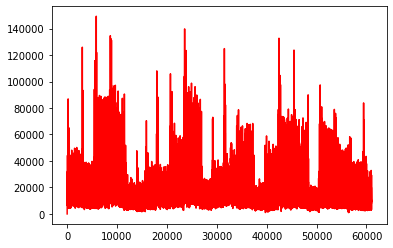

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.fittedvalues, color='red')

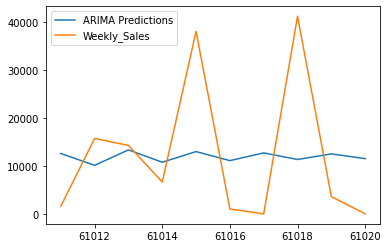

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error
test.mean()
mse_arima_test=mean_squared_error(pred,test)
print(mse_arima_test)

216511283.02831358


### Ridge Regression

In [ ]:
X,X_test, y, y_test = df_finX, df_testX, df_finY, df_testY
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y)
predictions =clf.predict(X)
mse_ridge_train = mean_squared_error(y,predictions)
print(mse_ridge_train)
predictions =clf.predict(X_test)
mse_ridge_test = mean_squared_error(y_test,predictions)
print(mse_ridge_test)

624527208.0936185
659825024.6777557


###Table of Results

In [ ]:
from math import sqrt
s1 = pd.DataFrame([["Linear Regression",mse_linear_train,mse_linear_test,sqrt(mse_linear_train),sqrt(mse_linear_test)]],columns=["Algorithms", "First 10 stores (combined data) MSE", "store_11_35 MSE", "First 10 stores (combined data) RMSE", "store_11_35 RMSE"])
s2 = pd.DataFrame([["ARIMA",mse_arima_train,mse_arima_test,sqrt(mse_arima_train),sqrt(mse_arima_test)]],columns=["Algorithms", "First 10 stores (combined data) MSE", "store_11_35 MSE", "First 10 stores (combined data) RMSE", "store_11_35 RMSE"])
s3 = pd.DataFrame([["XGBoost",mse_xgb_train,mse_xgb_test,sqrt(mse_xgb_train),sqrt(mse_xgb_test)]],columns=["Algorithms", "First 10 stores (combined data) MSE", "store_11_35 MSE", "First 10 stores (combined data) RMSE", "store_11_35 RMSE"])
s4 = pd.DataFrame([["Ridge Regression",mse_ridge_train,mse_ridge_test,sqrt(mse_ridge_train),sqrt(mse_ridge_test)]],columns=["Algorithms", "First 10 stores (combined data) MSE", "store_11_35 MSE", "First 10 stores (combined data) RMSE", "store_11_35 RMSE"])
results = pd.concat([s1,s2,s3,s4],axis=0)
results

,Algorithms,First 10 stores (combined data) MSE,store_11_35 MSE,First 10 stores (combined data) RMSE,store_11_35 RMSE
0,Linear Regression,6.245272e+08,6.598217e+08,24990.542372,25686.994908
0,ARIMA,4.833771e+08,2.165113e+08,21985.838076,14714.322377
0,XGBoost,1.795385e+08,3.682406e+08,13399.197743,19189.597306
0,Ridge Regression,6.245272e+08,6.598250e+08,24990.542373,25687.059479


# 2.2.1
##Q2

In [ ]:
df_stores = pd.read_csv("./CECS551_dataset_01/stores.csv")
df_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
df_train = pd.read_csv("./CECS551_dataset_01/train.csv")
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
df_sec = pd.merge(df_train,df_stores,"left",["Store"])
df_sec = df_sec.dropna()
df_sec

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221
421566,45,98,2012-10-05,628.10,False,B,118221
421567,45,98,2012-10-12,1061.02,False,B,118221
421568,45,98,2012-10-19,760.01,False,B,118221


In [ ]:
df_sec['Date']=pd.to_datetime(df_sec['Date']).apply(pd.Timestamp.timestamp)
df_sec = pd.get_dummies(df_sec, columns=['IsHoliday'], drop_first=True)
df_sec = df_sec.rename({"IsHoliday_True":"IsHoliday"},axis=1)
df_sec["IsHoliday"] = df_sec["IsHoliday"].astype("float64")
df_sec["Type"] = df_sec["Type"].replace(["A","B","C"],[1,2,3])
df_sec

,Store,Dept,Date,Weekly_Sales,Type,Size,IsHoliday
0,1,1,1.265328e+09,24924.50,1,151315,0.0
1,1,1,1.265933e+09,46039.49,1,151315,1.0
2,1,1,1.266538e+09,41595.55,1,151315,0.0
3,1,1,1.267142e+09,19403.54,1,151315,0.0
4,1,1,1.267747e+09,21827.90,1,151315,0.0
...,...,...,...,...,...,...,...
421565,45,98,1.348790e+09,508.37,2,118221,0.0
421566,45,98,1.349395e+09,628.10,2,118221,0.0
421567,45,98,1.350000e+09,1061.02,2,118221,0.0
421568,45,98,1.350605e+09,760.01,2,118221,0.0


In [ ]:
X = df_sec.drop(["Type"],axis=1).values
y = df_sec[["Type"]].values.reshape(X.shape[0],)

## Adaboost Classfier ( Ensemble model -1 )

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=10)
adaboost_model.fit(X, y)
adaboost_model.score(X, y)

0.7041179400811253

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle


In [ ]:
print("AUC = ")
roc_auc_score(y, adaboost_model.predict_proba(X),multi_class='ovr')

AUC = 


0.9071651925784323

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ['A', 'B', 'C']
print(classification_report(adaboost_model.predict(X), y, target_names=target_names))

              precision    recall  f1-score   support

           A       0.42      1.00      0.59     90743
           B       1.00      0.59      0.74    275521
           C       1.00      0.77      0.87     55306

    accuracy                           0.70    421570
   macro avg       0.81      0.79      0.74    421570
weighted avg       0.88      0.70      0.73    421570



In [ ]:
print("Confusion Matrix")
print(confusion_matrix(adaboost_model.predict(X), y))

Confusion Matrix
[[ 90743      0      0]
 [112026 163495      0]
 [ 12709      0  42597]]


In [ ]:
y_score = adaboost_model.fit(X, y).decision_function(X)
y = label_binarize(y, classes=[1, 2, 3])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

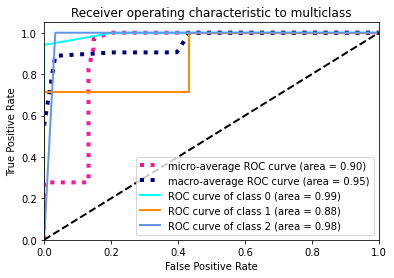

In [ ]:
# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## Gradient Boosting Classifier Results

In [ ]:
X = df_sec.drop(["Type"],axis=1).values
y = df_sec[["Type"]].values.reshape(X.shape[0],)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_Boosting_Classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
Gradient_Boosting_Classifier.score(X, y)

1.0

In [ ]:
Gradient_Boosting_Classifier.predict_proba(X)

array([[9.93479300e-01, 6.25813028e-03, 2.62569420e-04],
       [9.93479300e-01, 6.25813028e-03, 2.62569420e-04],
       [9.93479300e-01, 6.25813028e-03, 2.62569420e-04],
       ...,
       [3.78649594e-03, 9.86867060e-01, 9.34644371e-03],
       [3.78649594e-03, 9.86867060e-01, 9.34644371e-03],
       [3.78649594e-03, 9.86867060e-01, 9.34644371e-03]])

In [ ]:
print("AUC = ")
roc_auc_score(y, Gradient_Boosting_Classifier.predict_proba(X),multi_class='ovr')

AUC = 


1.0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ['A', 'B', 'C']
print(classification_report(Gradient_Boosting_Classifier.predict(X), y, target_names=target_names))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00    215478
           B       1.00      1.00      1.00    163495
           C       1.00      1.00      1.00     42597

    accuracy                           1.00    421570
   macro avg       1.00      1.00      1.00    421570
weighted avg       1.00      1.00      1.00    421570



In [ ]:
print("Confusion Matrix")
print(confusion_matrix(Gradient_Boosting_Classifier.predict(X), y))

Confusion Matrix
[[215478      0      0]
 [     0 163495      0]
 [     0      0  42597]]


In [ ]:
y_score = Gradient_Boosting_Classifier.fit(X, y).decision_function(X)
y = label_binarize(y, classes=[1, 2, 3])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
lw=2

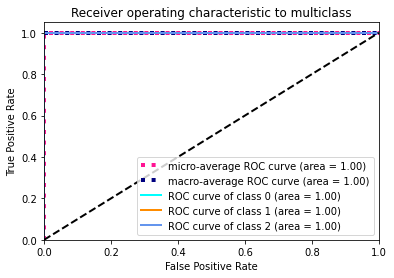

In [ ]:
# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier Results

In [ ]:
X = df_sec.drop(["Type"],axis=1).values
y = df_sec[["Type"]].values.reshape(X.shape[0],)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_Classifier = RandomForestClassifier(n_estimators=5, max_depth=None, min_samples_split=2, random_state=0).fit(X, y)
Random_Forest_Classifier.score(X, y)

1.0

In [ ]:
print("AUC = ")

roc_auc_score(y, Random_Forest_Classifier.predict_proba(X),multi_class='ovr')

AUC = 


1.0

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ['A', 'B', 'C']
print(classification_report(Random_Forest_Classifier.predict(X), y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    215478
           2       1.00      1.00      1.00    163495
           3       1.00      1.00      1.00     42597

    accuracy                           1.00    421570
   macro avg       1.00      1.00      1.00    421570
weighted avg       1.00      1.00      1.00    421570



In [ ]:
print("Confusion Matrix")
print(confusion_matrix(Random_Forest_Classifier.predict(X), y))

Confusion Matrix
[[215478      0      0]
 [     0 163495      0]
 [     0      0  42597]]


In [ ]:
y_score = Gradient_Boosting_Classifier.fit(X, y).decision_function(X)
y = label_binarize(y, classes=[1, 2, 3])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

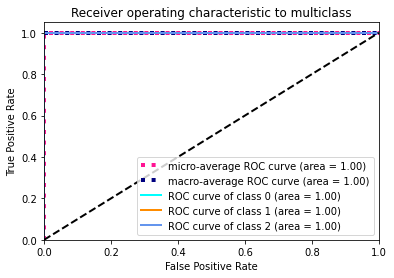

In [ ]:
# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## CNN Model

In [ ]:
df_sec["Weekly_Sales"] = df_sec["Weekly_Sales"].apply(lambda x:abs(x))
df_sec.describe()

,Store,Dept,Date,Weekly_Sales,Type,Size,IsHoliday
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,1.308386e+09,15981.676377,1.589912,136727.915739,0.070358
std,12.785297,30.492054,2.496680e+07,22710.889199,0.666337,60980.583328,0.255750
min,1.000000,1.000000,1.265328e+09,0.000000,1.000000,34875.000000,0.000000
25%,11.000000,18.000000,1.286496e+09,2079.757500,1.000000,93638.000000,0.000000
50%,22.000000,37.000000,1.308269e+09,7612.030000,1.000000,140167.000000,0.000000
75%,33.000000,74.000000,1.330042e+09,20205.852500,2.000000,202505.000000,0.000000
max,45.000000,99.000000,1.351210e+09,693099.360000,3.000000,219622.000000,1.000000


In [ ]:
X = df_sec.drop(["Type","Date"],axis=1).astype("float").values.reshape(-1,5,1)
y = pd.get_dummies(df_sec, columns=['Type'])[["Type_1","Type_2","Type_3"]]
y

,Type_1,Type_2,Type_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
421565,0,1,0
421566,0,1,0
421567,0,1,0
421568,0,1,0


In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
def Model1(trainX, trainy):
    # head 1
    inputs1 = Input(shape=(5,1))
    conv1 = Conv1D(filters=64, kernel_size=1, activation='relu')(inputs1)
    flat1 = Flatten()(conv1)
    dense1 = Dense(10, activation='relu')(flat1)
    outputs = Dense(3, activation='softmax')(dense1)
    model = Model(inputs=inputs1, outputs=outputs)
    return model

In [ ]:
model=Model1(X, y)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=40,batch_size=5000,validation_split=0.1)

Epoch 1/40
76/76 [==============================] - 1s 14ms/step - loss: 395.5198 - accuracy: 0.4878 - val_loss: 786.4140 - val_accuracy: 0.2289
Epoch 2/40
76/76 [==============================] - 1s 13ms/step - loss: 147.4341 - accuracy: 0.5016 - val_loss: 277.5372 - val_accuracy: 0.2763
Epoch 3/40
76/76 [==============================] - 1s 12ms/step - loss: 121.8426 - accuracy: 0.4975 - val_loss: 232.1115 - val_accuracy: 0.2286
Epoch 4/40
76/76 [==============================] - 1s 13ms/step - loss: 71.9813 - accuracy: 0.5169 - val_loss: 189.7567 - val_accuracy: 0.3046
Epoch 5/40
76/76 [==============================] - 1s 11ms/step - loss: 47.5513 - accuracy: 0.5271 - val_loss: 26.0377 - val_accuracy: 0.5209
Epoch 6/40
76/76 [==============================] - 1s 12ms/step - loss: 77.1801 - accuracy: 0.5135 - val_loss: 147.5052 - val_accuracy: 0.2917
Epoch 7/40
76/76 [==============================] - 1s 12ms/step - loss: 119.6761 - accuracy: 0.5174 - val_loss: 104.3518 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


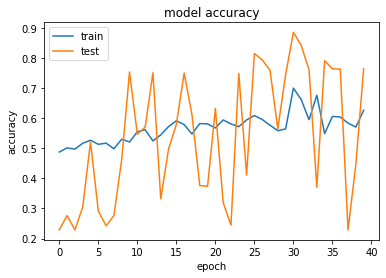

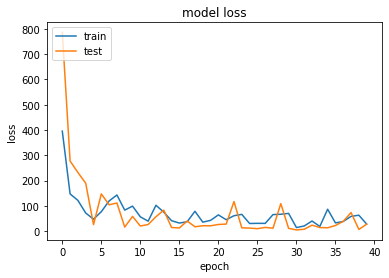

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("AUC = ")

roc_auc_score(y, model.predict(X),multi_class='ovr')

AUC = 
13175/13175 [==============================] - 13s 996us/step


0.7312291812124077

In [ ]:
preds = model.predict(X)

13175/13175 [==============================] - 27s 2ms/step


In [ ]:
preds

array([[9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       ...,
       [2.4425398e-10, 1.3091347e-24, 9.9999994e-01],
       [2.1534299e-10, 1.7292482e-24, 1.0000000e+00],
       [2.4592942e-10, 1.2875805e-24, 1.0000000e+00]], dtype=float32)

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y.values.argmax(axis=1),preds.argmax(axis=1)))

Confusion Matrix
[[202771      1  12706]
 [134141    411  28943]
 [   154    175  42268]]


In [ ]:
y_score = model.fit(X, y).decision_function(X)
y = label_binarize(y, classes=[1, 2, 3])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

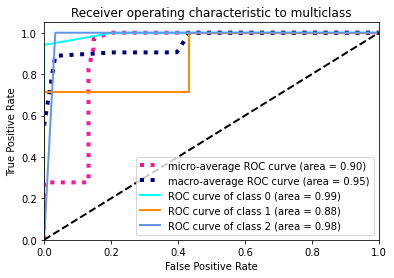

In [ ]:
# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## RNN Model Results

In [ ]:
preds_rnn = RNNmodel.predict(X)

13175/13175 [==============================] - 22s 2ms/step


In [ ]:
print("AUC = ")

roc_auc_score(y, preds_rnn ,multi_class='ovr')

AUC = 


0.9950391896424594

In [ ]:
preds_rnn

array([[9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       ...,
       [2.4425398e-10, 1.3091347e-24, 9.9999994e-01],
       [2.1534299e-10, 1.7292482e-24, 1.0000000e+00],
       [2.4592942e-10, 1.2875805e-24, 1.0000000e+00]], dtype=float32)

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y.values.argmax(axis=1),preds.argmax(axis=1)))

Confusion Matrix
[[205678   9767     33]
 [   286 163209      0]
 [   313  10334  31950]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_true, preds, average='macro')

In [ ]:
y_score = roc_curve(y.ravel(), y_score.ravel())

In [ ]:
y_score = RNNmodel.fit(X, y).decision_function(X)
y = label_binarize(y, classes=[1, 2, 3])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

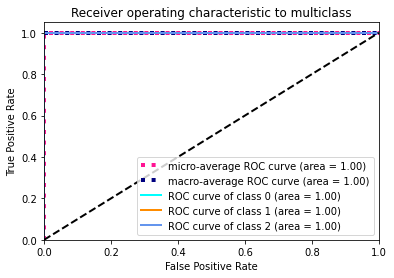

In [ ]:
# First aggregate all false positive rates
n_classes = 3
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_sec["Weekly_Sales"] = df_sec["Weekly_Sales"].apply(lambda x:abs(x))
df_sec.describe()

,Store,Dept,Date,Weekly_Sales,Type,Size,IsHoliday
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,1.308386e+09,15981.676377,1.589912,136727.915739,0.070358
std,12.785297,30.492054,2.496680e+07,22710.889199,0.666337,60980.583328,0.255750
min,1.000000,1.000000,1.265328e+09,0.000000,1.000000,34875.000000,0.000000
25%,11.000000,18.000000,1.286496e+09,2079.757500,1.000000,93638.000000,0.000000
50%,22.000000,37.000000,1.308269e+09,7612.030000,1.000000,140167.000000,0.000000
75%,33.000000,74.000000,1.330042e+09,20205.852500,2.000000,202505.000000,0.000000
max,45.000000,99.000000,1.351210e+09,693099.360000,3.000000,219622.000000,1.000000


In [ ]:
X = df_sec.drop(["Type","Date"],axis=1).astype("float").values.reshape(-1,5,1)
y = pd.get_dummies(df_sec, columns=['Type'])[["Type_1","Type_2","Type_3"]]
y

,Type_1,Type_2,Type_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
421565,0,1,0
421566,0,1,0
421567,0,1,0
421568,0,1,0


In [ ]:
from keras.layers import SimpleRNN, SpatialDropout1D, Dense, LSTM, Embedding
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
RNNmodel = Sequential()
RNNmodel.add(Embedding(1000000, 3, input_length=5))
RNNmodel.add( SimpleRNN(10,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5),
                        bias_regularizer=regularizers.L2(1e-5),
                        activity_regularizer=regularizers.L2(1e-5)))
RNNmodel.add( Dense(10, activation='relu') )
RNNmodel.add( Dense(3, activation='softmax') )
RNNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 100
batch_size = 5000

history = RNNmodel.fit(X, y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

Epoch 1/100
76/76 [==============================] - 4s 31ms/step - loss: 0.7421 - accuracy: 0.6930 - val_loss: 1.4237 - val_accuracy: 0.2759
Epoch 2/100
76/76 [==============================] - 2s 23ms/step - loss: 0.1912 - accuracy: 0.9427 - val_loss: 1.3887 - val_accuracy: 0.2607
Epoch 3/100
76/76 [==============================] - 2s 23ms/step - loss: 0.0775 - accuracy: 0.9721 - val_loss: 1.4224 - val_accuracy: 0.2735
Epoch 4/100
76/76 [==============================] - 2s 23ms/step - loss: 0.0406 - accuracy: 0.9987 - val_loss: 1.5379 - val_accuracy: 0.4206
Epoch 5/100
76/76 [==============================] - 2s 22ms/step - loss: 0.0163 - accuracy: 0.9997 - val_loss: 1.5652 - val_accuracy: 0.4500
Epoch 6/100
76/76 [==============================] - 2s 23ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.6171 - val_accuracy: 0.4806
Epoch 7/100
76/76 [==============================] - 2s 23ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.6902 - val_accuracy: 0.4920
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


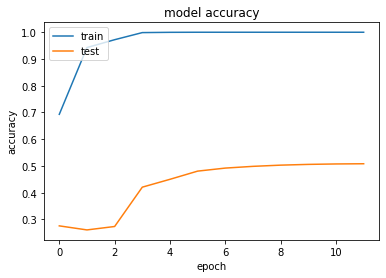

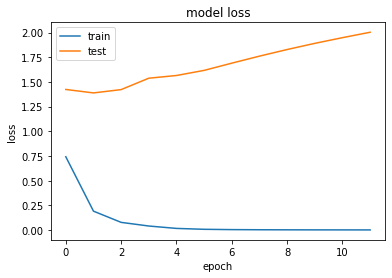

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()